This notebook covers the main notions to get you started.
Have a look at each cell, run it, and play around with the code :)

You can find many more tutorials in the repository https://github.com/JuliaAcademy/JuliaTutorials


Documentation can be found at https://docs.julialang.org/en/v1/ (or just Googling)

# Types and Variables

## Variables can change type

In [1]:
s = 0
println("s = $s, type = $(typeof(s))")
println("s = ", s)
    
s = "Dog"
println("s = $s, type = $(typeof(s))")
    
s = 2 == 4/2
println("s = $s, type = $(typeof(s))")

s = 'a'
println("s = $s, type = $(typeof(s))")

# You can assign a specific type to variable in a function or struct
function changeNum()
    x::Float64 = 10.4
    x = "Dog"
end

changeNum()  # Causes an error because x is fixed to being Float64

s = 0, type = Int64
s = 0
s = Dog, type = String
s = true, type = Bool
s = a, type = Char


LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mFloat64[39m
The function `convert` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:6[24m[39m
[0m  convert(::Type{T}, [91m::CartesianIndex{1}[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mmultidimensional.jl:136[24m[39m
[0m  convert(::Type{T}, [91m::AbstractChar[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mchar.jl:185[24m[39m
[0m  ...


In [2]:
import Pkg
#Pkg.add("LinearAlgebra")

## Other types

In [3]:
# Int8: [-128, 127]
# Int16 : [-2^15, 2^15-1]
# Int32 : [-2^31, 2^31-1]
# Int64 : [-2^63, 2^63-1]
# Float32, Float64, ...
# UInt8, UInt16 ... (unsigned int)
# BigFloat, BigInt (increased precision)

x = 9.8
println("float x is $x")
x = BigFloat(x)
println("big float x is $x")

float x is 9.8
big float x is 9.800000000000000710542735760100185871124267578125


## Casting

In [4]:
c = Char(120)
println(c)

myFloat = parse(Float64, "22.5")
println(myFloat)

myInt = UInt8(trunc(3.14))
println(myInt)

myFloat = Float32(4)
println(myFloat)

x
22.5
3
4.0


# Strings

<span style="color:red; font-size:25px">**Note: in Julia the first element of an array is at index 1, not 0!!**</span>

In [5]:
s = "hello there"
println(length(s))
    
# Indexing starts at 1!!
println("The first letter of ''$s'' is $(s[1])")

idx = findfirst(isequal(' '), s)
println("The second word in $s is '$(s[idx+1:end])'")

s = string("General", " Kenobi")
println(s)
println("Anakin" * " Skywalker")

animal = "elephant"
if "dog" < animal && occursin("o", "dog")
   println("dog is shorter than $animal\nand the letter 'o' is in dog")
elseif "dog" > animal
    println("dog is shorter than $animal")
else
    println("dog is as long as $animal")
end

11
The first letter of ''hello there'' is h
The second word in hello there is 'there'
General Kenobi
Anakin Skywalker
dog is shorter than elephant
and the letter 'o' is in dog


# Loops

In [6]:
i = 1
while i < 9
    if i%2 == 0
        s = i >= 3 ? "larger or equal" : "smaller"  # The so-called "ternary operator"
        println("$i is an even number, and is $s than 3")
    end
    i += 1
end

[println(i) for i=1:3]
[println(i) for i=1:2:5]
    
for i in [2,3,7]
    if i%2 == 0
        println(i)
    end
end

2 is an even number, and is smaller than 3
4 is an even number, and is larger or equal than 3
6 is an even number, and is larger or equal than 3
8 is an even number, and is larger or equal than 3
1
2
3
1
3
5
2


# Arrays

In [7]:
a1 = zeros(Float32, 2,3)  # Array with zeros
println("The matrix ", a1)
(h,w) = size(a1)
println("has size ", h, ", ", w, "\n")
a2 = Array{Float32}(undef, 3)  # Array with default uninitialised values
a3 = Float64[]  # Empty array

a = [1,3,5,7,9,11,13,15]
println("Array a is ", a)
elements = findall(a -> a > 5 ? true : false,a)
println("the elements of a that are larger than 5 are: $(a[elements]) \n")


b = [x^2 for x=1:4]
println("x^2 from 1 to 4 is $b")
println(size(b))
println(sum(b))
println(reduce(*,b))

a = [i for i=1:10]
println("\n a = $a")
println(maximum(a))
a *= 2
println("2*a = ", a)
println("(2*a)^2 =", a.^2)  # the dot is necessary to do operation element-wise

a = [1, 2.5, "hi"]  # Arrays can contain multiple types
println(a)

#import Pkg; Pkg.add("Printf")
using Printf

# Arrays can contain functions!
f(x) = √x  # do \sqrt + tab to get the sqrt symbol
a = [sin, cos, f]
for func in a
    @printf("%s(2π) =  %.2f\n", func, func(2π))
    # Note: @ is used to invoke macros. Macros are similar to functions, but they execute at parse-time instead of run-time, making them useful for optimising the code. See the documentation for details.
end


The matrix Float32[0.0 0.0 0.0; 0.0 0.0 0.0]
has size 2, 3

Array a is [1, 3, 5, 7, 9, 11, 13, 15]
the elements of a that are larger than 5 are: [7, 9, 11, 13, 15] 

x^2 from 1 to 4 is [1, 4, 9, 16]
(4,)
30
576

 a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10
2*a = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
(2*a)^2 =[4, 16, 36, 64, 100, 144, 196, 256, 324, 400]
Any[1, 2.5, "hi"]
sin(2π) =  -0.00
cos(2π) =  1.00
f(2π) =  2.51


## Splice, append and push
**Splice:**
Remove the item at the given index, and return the removed item. 
Subsequent items are shifted down to fill the resulting gap. 
If specified, replacement values from an ordered collection will be spliced in place of the removed item.

**Append:**
Appends one array to the other.

**Push:**
Appends elements which are not themselves in an array.

In [8]:
a = [i for i=1:10]
splice!(a, 5)
println(a)
splice!(a, 5:4, 5)
println(a)
splice!(a, 5:8, [1,1,1])
println(a)

push!(a, 11, 12, 13)
println(a)

append!(a, [14, 15, 16])
println(a)

println([a' reverse(a', dims=2)])

fibonacci = [1,1]
for i=1:10
    push!(fibonacci, fibonacci[end] + fibonacci[end-1])
end
println("fibonacci= $fibonacci")

[1, 2, 3, 4, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 1, 1, 1, 9, 10]
[1, 2, 3, 4, 1, 1, 1, 9, 10, 11, 12, 13]
[1, 2, 3, 4, 1, 1, 1, 9, 10, 11, 12, 13, 14, 15, 16]
[1 2 3 4 1 1 1 9 10 11 12 13 14 15 16 16 15 14 13 12 11 10 9 1 1 1 4 3 2 1]
fibonacci= [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]


# Multi-dimensional arrays

In [9]:
A = [rand(Int8) for i=1:2, j=1:3]
show(stdout, "text/plain", A)
println("\n")

A = [1 2 3; 4 5 6]
show(stdout, "text/plain", A * [1, 0, 0])
println("\n")

a = collect(2:2:10)
show(stdout, "text/plain", a)
println("\n")

A = rand(0:9, 2, 2)
show(stdout, "text/plain", A)

2×3 Matrix{Int8}:
  55  27   -36
 -92  25  -114

2-element Vector{Int64}:
 1
 4

5-element Vector{Int64}:
  2
  4
  6
  8
 10

2×2 Matrix{Int64}:
 4  5
 7  8

# Linear Algebra package

In [10]:
#using Pkg; Pkg.add("LinearAlgebra")
using LinearAlgebra

A = [rand(Int8) for i=1:3, j=1:3]
println("Matrix A = ")
show(stdout, "text/plain", A)
println("\n", "A has trace $(tr(A)), determinant $(det(A))")

I = round.(A * inv(A), digits = 14)  # Dot necessary to apply round() element-wise to the matrix
println("\n\n", "A times A^-1 gives the identity", "\n")
show(stdout, "text/plain", I)

Matrix A = 
3×3 Matrix{Int8}:
   2  -30  -27
  89  122   28
 -51  -57  -92
A has trace 32, determinant -253079.0


A times A^-1 gives the identity

3×3 Matrix{Float64}:
  1.0   0.0  0.0
 -0.0   1.0  0.0
 -0.0  -0.0  1.0

In [11]:
v = eigvecs(A)
λ = eigvals(A)

println("eigenvectors and eigenvalues of A")
for (vi,li) in zip(v,λ)
    println(vi)
    println(li, "\n")
end

eigenvectors and eigenvalues of A
0.20942419680631846
-90.4393219222541

-0.21350668618104335
30.405416902151725

0.9542307900859298
92.03390502010237



Factorize chooses the factorization method according to the matrix properties

In [12]:
factorize(A)  

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
  1.0         0.0       0.0
  0.0224719   1.0       0.0
 -0.573034   -0.394303  1.0
U factor:
3×3 Matrix{Float64}:
 89.0  122.0      28.0
  0.0  -32.7416  -27.6292
  0.0    0.0     -86.8493

# Tuples

In [13]:
t = (1,2,3,4)
println(t)

t = (watermelon = ("fruit", 3.5), coffee = ("drink", 24, 1.5))
println(t.coffee)
println(t[1])

(1, 2, 3, 4)
("drink", 24, 1.5)
("fruit", 3.5)


# Dictionaries

In [14]:
dict = Dict("π"=>3.142, "e"=>2.718)

# Adding another dictionary entry
dict["τ"] = 2*dict["π"]
println("Does dict contain the key π? $(haskey(dict, "π") ? "yes" : "no")")
println("Does dict contain the key √2? $(haskey(dict, "√2") ? "yes" : "no")")
dict["√2"] = round(√2, digits = 3)
    
for (key,value) in dict
    println(key, " : ", value)
end

Does dict contain the key π? yes
Does dict contain the key √2? no
e : 2.718
τ : 6.284
√2 : 1.414
π : 3.142


# Functions

## There are 3 ways to declare a function

In [15]:
function getSum(x, y, z = 4)
    return x + y + z
end
println(getSum(1,2,3))

g(x, y, z) = x + y + z
println(g(1,2,3))
    
h = (x,y,z) -> x + y + z
println(h(1,2,3))

6
6
6


## Functions with an exclamation mark ! modify the input

In [16]:
a = [2,4,3,1]
b = sort(a)  # Leaves a unchanged, but returns results of sorting
println("a = $a is still unsorted, but b = $b is sorted")

sort!(a)  # modifies a
println("a = $a is now sorted")

a = [2, 4, 3, 1] is still unsorted, but b = [1, 2, 3, 4] is sorted
a = [1, 2, 3, 4] is now sorted


## Unkown number of arguments

In [17]:
function getSum2(text, args...)
    sum = 0
    for a in args
        sum += a
    end
    println("$text $sum\n")
end
getSum2("the sum of 1 + 2 + 3  = ", 1, 2, 3)

# Return a tuple
function next2numbers(a)
    return (a+1, a+2)
end
a = 40
(a1, a2) = next2numbers(a)
println("$a + 1 = $a1, and $a + 2 = $a2")

the sum of 1 + 2 + 3  =  6

40 + 1 = 41, and 40 + 2 = 42


## Variable scope

In [18]:
a = 10
function f(a)
    a += 2
    println("local a = $a")
end
f(a)
println("global a = $a")

function f()
    global a += 2
    println("local a = $a")
end
f()
println("global a = $a")  

local a = 12
global a = 10
local a = 12
global a = 12


## Multiple dispatch

In [19]:
function getMult(a::Number, b::Number)  # a and b are of the abstract type Number
    return a * b
end

function getMult(a::String, b::String)
    return parse(Int8, a) * parse(Int8, b)
end
println("5 * 3 = ", getMult(5, 3))
println("5 * 3 = ", getMult("5", "3"))

5 * 3 = 15
5 * 3 = 15


## Anonymous functions

In [20]:
println(map(x -> 3x, [3,4,5]))
println(map((x, y) -> x + y, [1,1], [3,6]))

sentence = "Obi Wan Kenobi"
println("The longest word in $sentence is ")
println(reduce((x, y) -> length(x) > length(y) ? x : y, split(sentence)))

[9, 12, 15]
[4, 7]
The longest word in Obi Wan Kenobi is 
Kenobi


## Mapping and Broadcasting

In [21]:
a = [1,2,3]
rmap = map(x -> x + 1, a)
rbro = broadcast(x -> x + 1, a)
println("map and broadcast do the same for a single array")
println(rmap, rbro, "\n")


println("But they are different when applied to arrays of different sizes")
rmap = map(+, 1, [1,2,3])
println("map gives $rmap, so it only applies the function to one element")
rbro = broadcast(+, 1, [1,2,3])
println("broadcast gives $rbro. The smaller input is 'broadcasted' to have the same shape as the other one!")

map and broadcast do the same for a single array
[2, 3, 4][2, 3, 4]

But they are different when applied to arrays of different sizes
map gives [2], so it only applies the function to one element
broadcast gives [2, 3, 4]. The smaller input is 'broadcasted' to have the same shape as the other one!


In [22]:
rbro = 1 .+ [1,2,3]  # Using a dot . is the same as broadcasting!

3-element Vector{Int64}:
 2
 3
 4

In [23]:
f(x) = x^2
f.([1,2,3])

3-element Vector{Int64}:
 1
 4
 9

# Symbols
(usually used as dictionary keys)

In [24]:
d = Dict(:pi=>3.14, :e=>2.718)
println(d[:e])

2.718


# Structs

In [25]:
struct Animal
    name::String
    weight::Float64
end

function print_name(animal::Animal)
    println("The name of this animal is $(animal.name)")
end

dog = Animal("good boy", 35)
print_name(dog)

println("Now let's try to rename the dog")
dog.name = "new name"  # error because structs are immutable!

The name of this animal is good boy
Now let's try to rename the dog


LoadError: setfield!: immutable struct of type Animal cannot be changed

## Mutable structs

In [26]:
mutable struct Animal2
    name::String
    weight::Float64
end

function print_name(animal::Animal2)
    println("The name of this animal is $(animal.name)")
end

dog = Animal2("good boy", 35)
println(dog.name)
dog.name = "new name"  # now we made struct mutable so we can change its variables
println(dog.name)

good boy
new name


# Abstract types
(Like "pure virtual" structs from C++, since they can't be instantiated, but they can have subtypes)

In [27]:
abstract type Vehicle end
    
struct Car <: Vehicle
    brand::String
    wheels::Int8
end

struct Bike <: Vehicle
    color::String
    wheels::Int8
end

function nWheels(v::Vehicle)
    return v.wheels
end
    
function otherInfo(v::Car)
     return v.brand
end
function otherInfo(v::Bike)
     return v.color
end
    
myBike = Bike("red", 2)
myCar = Car("Citroen", 4)
n = nWheels(myCar)
b = otherInfo(myCar)
println("car has $n wheels, and is a $b")
n = nWheels(myBike)
b = otherInfo(myBike)    
println("bike has $n wheels, and is $b")
    

car has 4 wheels, and is a Citroen
bike has 2 wheels, and is red


## Example abstract type Number

In [28]:
# Number is an abstract type too, that already exists in Julia.

# We can create a new struct that is a sub-type number
# We define D as a function-derivative pair: D has 2 numbers, a f(x) and f'(x) for a given x
struct D <: Number  
    f::Tuple{Float64,Float64}
end

# And we can overload operators to correctly behave with this new type
# f'(x) should multiply and divide using the product and quotient rules
import Base: +, -, *, /, convert, promote_rule, round
+(x::D, y::D) = D(x.f .+ y.f)
-(x::D, y::D) = D(x.f .- y.f)
*(x::D, y::D) = D((x.f[1] * y.f[1], 
        x.f[1] * y.f[2] + x.f[2] * y.f[1]))
/(x::D, y::D) = D((x.f[1] / y.f[1], (
            y.f[1] * x.f[2] - x.f[1] * y.f[2]) / y.f[1]^2))
convert(::Type{D}, x::Real) = D((x,zero(x)))
promote_rule(::Type{D}, ::Type{<:Number}) = D
round(x::D, d::Integer) = D((round(x.f[1], digits = d), round(x.f[2], digits = d)))

# As an example, let us compute the derivative of sin from these simple rules that we defined
function TaylorExpSin(x)
    # 7th order expansion on sin(x)
    return round(x - x^3 / factorial(3) + x^5 / factorial(5) - x^7 / factorial(7), 4)
end

x = pi / 3
println("For x = $x, sin(x) = $(sin(x)), and its derivative is cos(x)=$(cos(x)) \n")
println("Instead of calculating the derivative of sin(x), we can do it with our new type D")
d = D((x,1))
println("d now contains x and its derivative x' = 1, d = $d \n")
println("If we apply the Taylor expansion of sin(x) to d, we will get sin(x) and its derivative, simply because we defined the algebra rules for derivarives: ")
println("TaylorExpSin(d) = $(TaylorExpSin(d)). It worked! :)")

For x = 1.0471975511965976, sin(x) = 0.8660254037844386, and its derivative is cos(x)=0.5000000000000001 

Instead of calculating the derivative of sin(x), we can do it with our new type D
d now contains x and its derivative x' = 1, d = D((1.0471975511965976, 1.0)) 

If we apply the Taylor expansion of sin(x) to d, we will get sin(x) and its derivative, simply because we defined the algebra rules for derivarives: 
TaylorExpSin(d) = D((0.866, 0.5)). It worked! :)


# File input/output
    

In [29]:
open("test.txt", "w") do file
    write(file, "hello\ngoodbye")
end

open("test.txt") do file
    for line in eachline(file)
        println(line)
    end
end

hello
goodbye


# Plotting

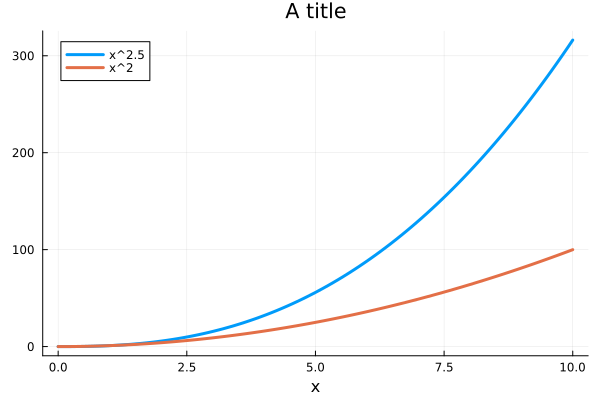

In [30]:
# We can plot using different backends, including some python libraries like Plotly and PyPlot!

#using Pkg; Pkg.add("Plots"); Pkg.add("Plotly"); Pkg.add("PyPlot"); Pkg.add("GR"); Pkg.add("UnicodePlots")
using Plots
gr()  # With this line we specify that we want to plot with the "GR" backend

x = LinRange(0, 10, 100) 
plot(x,map(x->x^2.5,x), label = "x^2.5", width = 3)
plot!(x,map(x->x^2,x), label = "x^2", width = 3)
plot!(title = "A title", xlabel = "x")


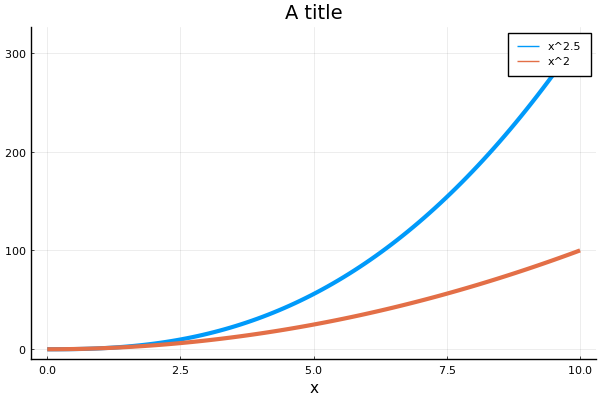

In [33]:
#import Pkg; Pkg.add("PyPlot")
pyplot()  # Now we're using the pyplot backend

plot(x,map(x->x^2.5,x), label = "x^2.5", width = 3)
plot!(x,map(x->x^2,x), label = "x^2", width = 3)
plot!(title = "A title", xlabel = "x")

In [34]:
unicodeplots()

plot(Plots.fakedata(50, 5), w = 3)
# plot(x,map(x->x^2.5,x), label = "x^2.5", width = 3)
# plot!(x,map(x->x^2,x), label = "x^2", width = 3)
# plot!(title = "A title", xlabel = "x")

            +----------------------------------------+   
    13.5611 ||             ,.                        | y1
            ||             |\                        | y2
            ||            .`",.                      | y3
            ||            .  /\.                     | y4
            ||        .*""     .                     | y5
            ||       .`        .        /.           |   
            ||      .,         "*.  .\ . \.          |   
            ||  _  ./   .  .r.   /\.v\L1 .\          |   
            || / -./  .,'\./ '..*)}\L-@"L/L_/,.      |   
            ||.L . , .`'_//  /"-.,       \-.*-".     |   
            |+{@@@v@rVr-r--vrv----vr--------rrr@@rrv-|   
            || \.\/ \/  /v-\r`  .-"\1,      /|@.,^Tl |   
            ||  "^.  ../ 'v\..../    \.,_. _}`"r1rv/ |   
            ||    \. /'     '`"'      \/"T,`     '`\ |   
   -5.66941 ||     /\`                   "T          |   
            +----------------------------------------+   
             -

# Example of automatic differentiation
One important library available in Julia is its automatic differentiation tools, especially useful for ML.
Automatic differentiation computes a derivative using the chain-rule on the computer operations. 
This is more accurate than numerical derivation, and more efficient than symbolic by hand derivation.

In [35]:
#using Pkg; Pkg.add("ForwardDiff")
using ForwardDiff

"""
    Newton(x::Float64, f, n::Int64, plotPoints::Bool)
Newton method to find f(x) = 0

x is the starting guess

n is the number of iterations
"""
function Newton(x::Float64, f, n::Int64 = 10)
    xs = zeros(Float64, n+1)
    for i=1:n
        xs[i] = x
        x -= f(x)/ForwardDiff.derivative(f, x)
    end
    xs[n+1] = x
    return x,xs
end

@doc Newton  # To see the documentation for the function

   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [f6369f11] + ForwardDiff v0.10.36
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.1
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [f6369f11] + ForwardDiff v0.10.36
  [276daf66] + SpecialFunctions v2.4.0
  [efe28fd5] + OpenSpecFun_jll v0.5.5+0
Precompiling project...
   1168.1 ms  ✓ DiffResults
   1041.9 ms  ✓ CommonSubexpressions
   1132.3 ms  ✓ OpenSpecFun_jll
   3009.0 ms  ✓ SpecialFunctions
   1028.8 ms  ✓ DiffRules
   1041.5 ms  ✓ ColorVectorSpace → SpecialFunctionsExt
   3800.0 ms  ✓ ForwardDiff
   1205.2 ms  ✓ ForwardDiff → ForwardDiffStaticArraysExt
  8 dependencies successfully precompiled in 12 seconds. 221 already precompiled.


```
Newton(x::Float64, f, n::Int64, plotPoints::Bool)
```

Newton method to find f(x) = 0

x is the starting guess

n is the number of iterations


   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [a03496cd] + PlotlyBase v0.8.19
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


Numerical result is x_0 = 2.8284685718801468
Analytical result is sqrt(8) = 2.8284271247461903
[1.8, 3.6, 5.4, 7.2, 9.0]


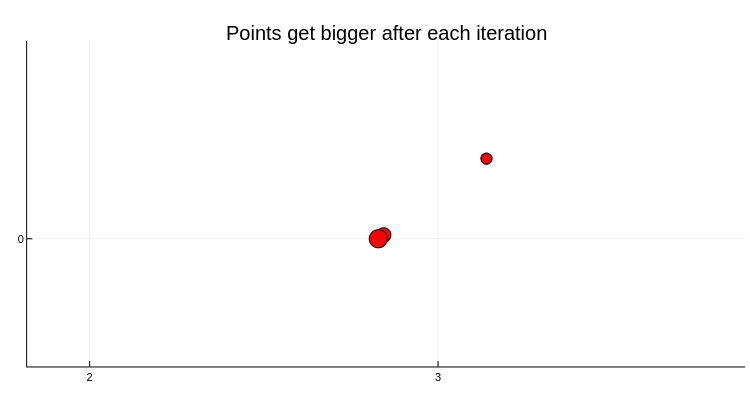

In [37]:
#import Pkg; Pkg.add("PlotlyBase")
f(x) = x^2 - 8

x0,xs = Newton(1.0,f, 4)

println("Numerical result is x_0 = ", x0)
println("Analytical result is sqrt(8) = ",√8)

plotly()
markersize = [9*i/length(xs) for i = 1:length(xs)]
println(markersize)
scatter(xs, f.(xs), color = "red", label = false, ms = markersize)
title!("Points get bigger after each iteration")

# More...

Explore more Julia packages at https://juliahub.com/ui/Home